# The transformer model for sequence prediction

Deep learning is all about *learning* useful *functions* from big *datasets*. These useful functions are called neural networks, and are put together from smaller functions with parameters that are decided through optimization. In opposition to conventional programming, where we tell the computer what to do, nevral networks learns from observational data and figure out its own solution to the given problem. Here we will implement the transformer model, one of the main components in big languagemodels like *ChatGPT*.

## **1.0** Structure of the datasets and the transformermodel

**(1)** Let          $a = 15$, $b = 7$, $c = 47$, $d = 152$

then we have   $[1, 5, 7, 4, 7, 1, 5]$, $y =[1, 5, 2]$


**(2)** Let   

$x^{(0)} = [1, 5, 7, 4, 7]$

$x^{(1)} = [1, 5, 7, 4, 7, \hat{z_4}]$

$x^{(2)} = [1, 5, 7, 4, 7, \hat{z_4}, \hat{z_5}]$

$x^{(3)} = [1, 5, 7, 4, 7, \hat{z_4}, \hat{z_5}, \hat{z_6}]$

$f_{\theta}(x^{(0)}) = [\hat{z_0^{(0)}}, \hat{z_1^{(0)}}, \hat{z_2^{(0)}}, \hat{z_3^{(0)}}, \hat{z_4^{(0)}}]$

$f_{\theta}(x^{(0)}) = [\hat{z_0^{(1)}}, \hat{z_1^{(1)}}, \hat{z_2^{(1)}}, \hat{z_3^{(1)}}, \hat{z_4^{(1)}}, \hat{z_5^{(1)}}]$

$f_{\theta}(x^{(0)}) = [\hat{z_0^{(2)}}, \hat{z_1^{(2)}}, \hat{z_2^{(2)}}, \hat{z_3^{(2)}}, \hat{z_4^{(2)}}, \hat{z_5^{(2)}}, \hat{z_6^{(2)}}]$

If the optimization is good, the result should be:

$\hat{z_4^{(0)}} = 1, \hat{z_5^{(1)}} = 5$ og $\hat{z_6^{(2)}} = 2$

**(3)**

For the object function to be $\mathcal{L}(\theta, \mathcal{D}) = 0$, the probability distribution must be given by:

$\hat{Y} = onehot(y) = \begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
\end{bmatrix}$

In this case $\hat{y}$ will be given by:

$\hat{y} := argmax(\hat{Y}) = y$

Then, $\mathcal(L) = 0$ will be fulfilled.

**(4)**

The number of parameters is given by:

$d(2m + n_{max} + L(4k + 2p))$

**(5)**

$X = onehot(x) = \begin{bmatrix}
0 \\
1
\end{bmatrix}, z_0 = W_Ex + [W_P]_{0:n} = \begin{bmatrix}
1 & 0 \\
0 & \alpha
\end{bmatrix} \begin{bmatrix}
0 \\
1
\end{bmatrix} + \begin{bmatrix}
1 \\
0
\end{bmatrix} = \begin{bmatrix}
0 \\
\alpha
\end{bmatrix} + \begin{bmatrix}
1 \\
0
\end{bmatrix} = \begin{bmatrix}
1 \\
\alpha
\end{bmatrix}$

$Z = softmax(\begin{bmatrix}
1
\alpha
\end{bmatrix}) = \begin{bmatrix}
\frac{e^1}{e^1+1^{\alpha}} \\
\frac{e^{\alpha}}{e^1+e^{\alpha}}
\end{bmatrix}$

$\hat{z} = 1 \Rightarrow \alpha > 1$ (when $\alpha=1$, undefined)


## **2.0** Implementing the transformermodel

**(1)** 

1) If the type of layer is identified as `LinearLayer` or `Attention`, `NeuralNetwork` will inherit `step_gd` from the `Layer` class. 

2) If the type of layer is identified as `EmbedPosition`, `NeuralNetwork` will inherit `step_gd` from the `EmbedPosition` class. 

3) If the type of layer is identified as `FeedForward`, `NeuralNetwork` will inherit `step_gd` from the `FeedForward` class.


In [1]:
from neural_network import *
from layers import *
from training import trainModel
import numpy as np
from data_generators import get_train_test_addition, get_train_test_sorting
from training import *
import pickle


In [2]:
r = 5
m = 2
batchSize = 250
batches = 10
d = 10
k = 5
p = 15
L = 2
n_max = 2*r-1
sigma = Relu

data = get_train_test_sorting(r,m,batchSize, batches)


In [3]:
embed = EmbedPosition(n_max,m,d)
att1 = Attention(d,k)
att2 = Attention(d,k)
ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

att_ffd_list = []
for layer in range(L):
    att = Attention(d,k)
    ff = FeedForward(d,p)
    att_ffd_list.append(att)
    att_ffd_list.append(ff)

layers = [embed] + att_ffd_list + [un_embed] + [softmax]
nn = NeuralNetwork(layers)

In [4]:
losses = trainModel(nn,data,100,loss, m, r, 0.001)
losses.shape

Iterasjon  0  L =  0.6849574875246355  gradient =  0.030905421306378165
Iterasjon  1  L =  0.664036909118789  gradient =  0.03026218817139768
Iterasjon  2  L =  0.6399281260431599  gradient =  0.02958236339446979
Iterasjon  3  L =  0.6121932853687432  gradient =  0.02889143363658224
Iterasjon  4  L =  0.5807229747652718  gradient =  0.02821838987643173
Iterasjon  5  L =  0.5458112983531043  gradient =  0.0276157038944924
Iterasjon  6  L =  0.5087402942955859  gradient =  0.027155300097134127
Iterasjon  7  L =  0.472120794742262  gradient =  0.02690813412527733
Iterasjon  8  L =  0.4385615873669618  gradient =  0.026918237290555765
Iterasjon  9  L =  0.409746794041122  gradient =  0.02718755064586766
Iterasjon  10  L =  0.386220733040593  gradient =  0.027673618837087872
Iterasjon  11  L =  0.36724159163448933  gradient =  0.028271162221564745
Iterasjon  12  L =  0.3514164854259768  gradient =  0.028829074161207297
Iterasjon  13  L =  0.3379786835106986  gradient =  0.02947313456085791


(100,)

[6.84957488e-01 6.64036909e-01 6.39928126e-01 6.12193285e-01
 5.80722975e-01 5.45811298e-01 5.08740294e-01 4.72120795e-01
 4.38561587e-01 4.09746794e-01 3.86220733e-01 3.67241592e-01
 3.51416485e-01 3.37978684e-01 3.26278698e-01 3.15937048e-01
 3.06680957e-01 2.98260391e-01 2.90565070e-01 2.83332472e-01
 2.76248815e-01 2.68985612e-01 2.61143566e-01 2.52635902e-01
 2.43437363e-01 2.33213994e-01 2.21317790e-01 2.07322288e-01
 1.91542694e-01 1.73830356e-01 1.53664490e-01 1.25874294e-01
 8.94140381e-02 6.48457431e-02 4.50491844e-02 3.20725938e-02
 2.38629302e-02 1.83069708e-02 1.45611661e-02 1.19940885e-02
 1.01177834e-02 8.69245209e-03 7.59197896e-03 6.70690778e-03
 5.98413884e-03 5.37958348e-03 4.86607382e-03 4.42601614e-03
 4.04430180e-03 3.71120403e-03 3.41848779e-03 3.15909520e-03
 2.92946981e-03 2.72265751e-03 2.53956599e-03 2.37394331e-03
 2.22519159e-03 2.08877765e-03 1.96605193e-03 1.85100510e-03
 1.74905415e-03 1.65128751e-03 1.56774731e-03 1.48453487e-03
 1.41370213e-03 1.342874

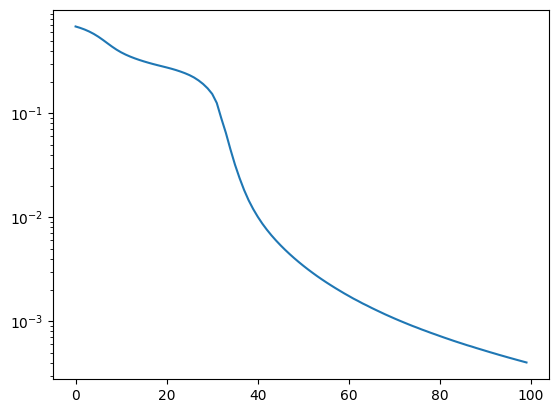

In [5]:
import matplotlib.pyplot as plt
len(losses)
print(losses)
plt.semilogy(losses)

In [6]:

# DO NOT RUN IF NOT NEW TRAINED MODEL
# with open("sortingTrained_v1", 'wb') as f:
    # pickle.dump(nn, f)

In [7]:
#with open("savedObject", 'rb') as f:
     #nn2 = pickle.load(f)

#type(nn2)

In [8]:
# with open("sortingTrained_v1", "rb") as f:
#     nn = pickle.load(f)

y_pred = predict(nn, data['x_test'], r, m)

0
(250, 5)
(250, 5)
(250, 1)
1
(250, 6)
(250, 6)
(250, 1)
2
(250, 7)
(250, 7)
(250, 1)
3
(250, 8)
(250, 8)
(250, 1)
4
(250, 9)
(250, 9)
(250, 1)


In [9]:
print(y_pred)
print()
print(data['y_test'])
np.count_nonzero(np.count_nonzero(y_pred == data['y_test'], axis=2) == y_pred.shape[-1])


[[[0. 0. 1. 1. 1.]
  [0. 1. 1. 1. 1.]
  [0. 0. 1. 1. 1.]
  ...
  [0. 1. 1. 1. 1.]
  [0. 1. 1. 1. 1.]
  [0. 0. 1. 1. 1.]]]

[[[0. 0. 1. 1. 1.]
  [0. 1. 1. 1. 1.]
  [0. 0. 1. 1. 1.]
  ...
  [0. 1. 1. 1. 1.]
  [0. 1. 1. 1. 1.]
  [0. 0. 1. 1. 1.]]]


250

In [10]:
r = 7
m = 5
batchSize = 250
batches = 10
iterations = 100
d = 20
k = 10
p = 25
L = 2
n_max = 2*r-1
sigma = Relu

In [11]:
data = get_train_test_sorting(r,m,batchSize, batches)

In [12]:
embed = EmbedPosition(n_max,m,d)
att1 = Attention(d,k)
att2 = Attention(d,k)

ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)

un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

nn = NeuralNetwork([embed,att1,ff1,att2, ff2, un_embed,softmax])

In [13]:
losses = trainModel(nn,data, iterations, loss, m, r)

Iterasjon  0  L =  1.2809337970454684  gradient =  4.973289293303838
Iterasjon  1  L =  0.7779311605141691  gradient =  0.051643676544802286
Iterasjon  2  L =  0.5948109627170146  gradient =  0.19164636237428606
Iterasjon  3  L =  0.396785518109433  gradient =  0.854643651805835
Iterasjon  4  L =  0.23975973117283078  gradient =  26.069136725347477
Iterasjon  5  L =  0.13637081957706426  gradient =  71.48588058454034
Iterasjon  6  L =  0.07579134269914303  gradient =  81.72941580769226
Iterasjon  7  L =  0.04620539954005436  gradient =  207.8031037450754
Iterasjon  8  L =  0.026692843980857205  gradient =  169.23312660677567
Iterasjon  9  L =  0.018445847071885263  gradient =  89.43951272204337
Iterasjon  10  L =  0.014132358018203927  gradient =  24.273039522713688
Iterasjon  11  L =  0.011040581364602634  gradient =  8.545910622917447
Iterasjon  12  L =  0.008981050856385491  gradient =  2.996742299587113
Iterasjon  13  L =  0.007605645387736585  gradient =  1.1376824513628756
Iteras

0
(250, 4)
(250, 4)
(250, 1)
1
(250, 5)
(250, 5)
(250, 1)
2
(250, 6)
(250, 6)
(250, 1)
3


ValueError: operands could not be broadcast together with shapes (250,30,7) (30,6) 

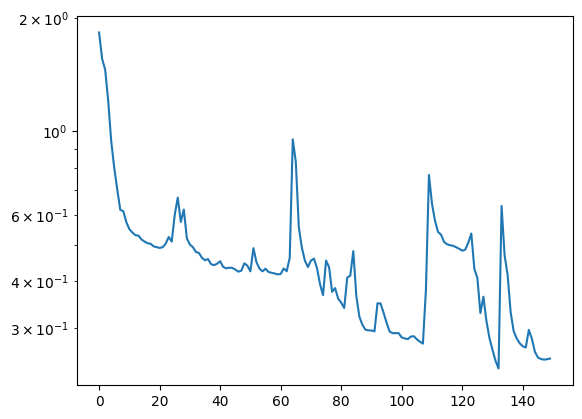

In [19]:
plt.semilogy(losses)
y_pred = predict(nn, data['x_test'], r, m)
np.count_nonzero(np.count_nonzero(y_pred == data['y_test'], axis=2) == y_pred.shape[-1])

plt.show(

)

In [16]:
batch_size = 250
batches = 20
d = 30
k=20
p=40
L=3
m=10
n_max = 2*2 + 3

data =get_train_test_addition(2,batch_size,20)
loss = CrossEntropy()


In [17]:
layers = []

embed = EmbedPosition(n_max - 1,m,d)
layers.append(embed)
for i in range(L):
    att1 = Attention(d,k)
    ff1 = FeedForward(d,p)

    layers.append(att1)
    layers.append(ff1)


un_embed = LinearLayer(d,m)
layers.append(un_embed)
softmax = Softmax()
layers.append(softmax)

nn = NeuralNetwork(layers)

In [18]:
losses = trainModel(nn,data, 150, loss, m, 3) #her kjem da dimensjonsfeil må sjekkes ut

Iterasjon  0  L =  1.8277864214539719  gradient =  0.16236162884765912
Iterasjon  1  L =  1.5569001275630487  gradient =  0.14937690750650423
Iterasjon  2  L =  1.4578281377841817  gradient =  0.14608353963955528
Iterasjon  3  L =  1.2083600718817387  gradient =  0.1956710542102024
Iterasjon  4  L =  0.9426231480107768  gradient =  0.11829754269770146
Iterasjon  5  L =  0.8004611827630287  gradient =  0.11169262850301022
Iterasjon  6  L =  0.700800087844099  gradient =  0.08466679209350637
Iterasjon  7  L =  0.619205183121276  gradient =  0.10233541264460154
Iterasjon  8  L =  0.6138778501473829  gradient =  0.09276192229795541
Iterasjon  9  L =  0.5743159665768754  gradient =  0.08904843521510389
Iterasjon  10  L =  0.5501273010589843  gradient =  0.08715876891317036
Iterasjon  11  L =  0.5390753352106604  gradient =  0.08758910775498017
Iterasjon  12  L =  0.5302431766217023  gradient =  0.08726306017433078
Iterasjon  13  L =  0.5288908341155065  gradient =  0.0847434948962623
Iteras

In [20]:
# DO NOT RUN IF NOT NEW TRAINED MODEL
# with open("sortingTrained_v2", 'wb') as f:
    # pickle.dump(nn, f)

with open("addition_nn2", "wb") as f:
    pickle.dump(nn,f)

In [22]:
with open("addition_nn", "rb") as f:
    nn = pickle.load(f)

y_pred = predict(nn, data['x_test'], 3, m)
print(f"Riktige:{np.count_nonzero(np.count_nonzero(y_pred[:,:,::-1] == data['y_test'], axis=2) == y_pred.shape[-1])}")
# print("X:")
# print(data['x_test'][0][:10])
print("Y:")
print((y_pred[0][:10,::-1]))
print("fasit")
print(data['y_test'][0][:10])


0
(250, 4)
(250, 4)
(250, 1)
1
(250, 5)
(250, 5)
(250, 1)
2
(250, 6)
(250, 6)
(250, 1)
Riktige:245
Y:
[[0. 5. 9.]
 [0. 8. 7.]
 [0. 6. 6.]
 [1. 2. 6.]
 [1. 1. 9.]
 [0. 4. 0.]
 [0. 6. 0.]
 [0. 5. 6.]
 [1. 3. 7.]
 [0. 9. 9.]]
fasit
[[0 5 8]
 [0 8 7]
 [0 6 6]
 [1 2 6]
 [1 1 9]
 [0 4 0]
 [0 6 0]
 [0 5 6]
 [1 3 7]
 [0 9 9]]
